In [24]:
import set_math
import set_sympy
import set_visualization

matplotlib imported
pyplot imported
seaborn imported
sns.set
sns.set_style(whitegrid)
sns.set_color_codes()
type (% matplotlib inline) if necessary
type (% config InlineBackend.figure_formats = {‘png’, ‘retina’}) if necessary


# Normal Distribution

In [14]:
mu = 0
std = 1
rv = sp.stats.norm(mu, std)
rv

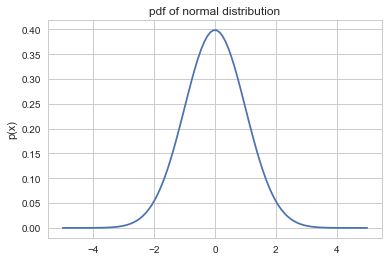

In [25]:
xx = np.linspace(-5, 5, 100)
plt.plot(xx, rv.pdf(xx))
plt.ylabel("p(x)")
plt.title("pdf of normal distribution")
plt.show()

In [16]:
np.random.seed(0)
x = rv.rvs(100)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574,
       -2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462,
       -1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877,
        0.15494743,  0.37816252, -0.88778575, -1.98079647, -0.34791215,
        0.15634897,  1.23029068,  1.20237985, -0.38732682, -0.30230275,
       -1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218,
       -0.4380743 , -1.25279536,  0.77749036, -1.61389785, -0.21274028,
       -0.89546656,  0.3869025 , -0.51080514, -1.18063218, -0.02818223,
        0.42833187,  0.06651722,  0.3024719 , -0.63432209, -0.36274117,
       -0.67246045, -0.35955316, -0.81314628, -1.7262826 ,  0.17742614,
       -0.40178094, -1.63019835,  0.46278226, -0.90729836,  0.05

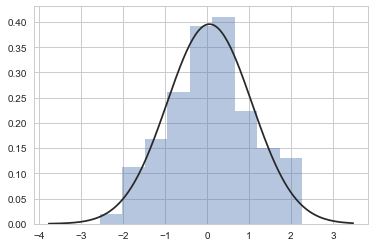

In [26]:
# 커널 히스토그램 플롯
sns.distplot(x, kde=False, fit=sp.stats.norm)
plt.show()

### Q-Q Plot

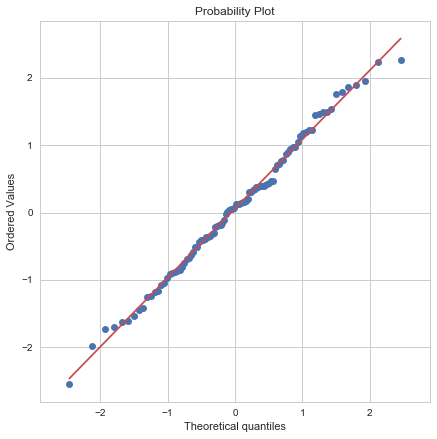

In [27]:
np.random.seed(0)
x = np.random.randn(100)
plt.figure(figsize=(7,7))
sp.stats.probplot(x, plot=plt)
plt.axis("equal")
plt.show()

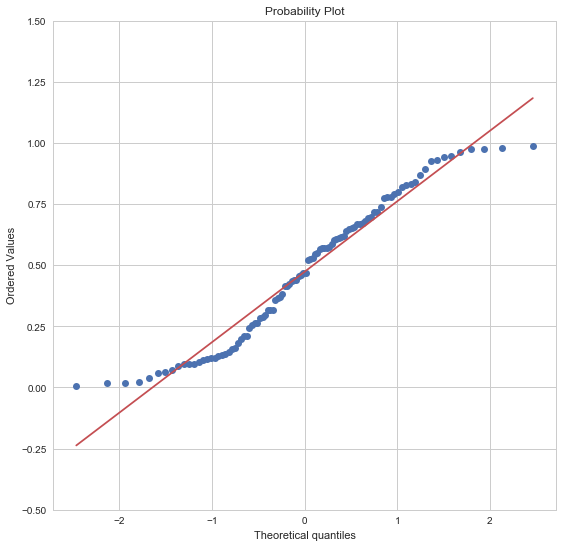

In [30]:
np.random.seed(0)
x = np.random.rand(100) 
# uniform 분포 구간을 정해서, 그 안에서 골고루 나온 데이터.
# -1, 1 사이만 나오는 분포.
plt.figure(figsize=(9,9))
sp.stats.probplot(x, plot=plt)
plt.ylim(-0.5, 1.5)
plt.show()

### central limit theorum

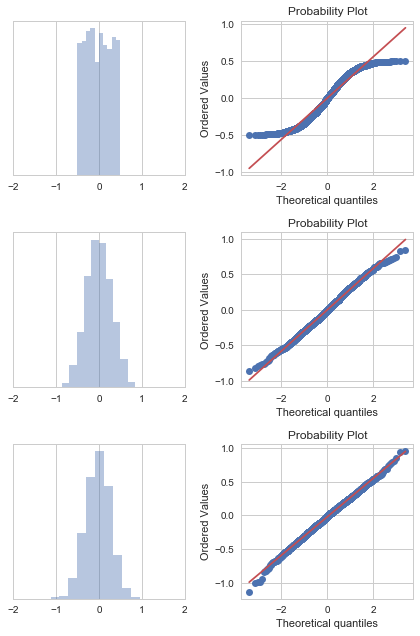

In [38]:
xx = np.linspace(-2, 2, 100)
plt.figure(figsize=(6,9))
for i, N in enumerate([1, 4, 100]):
    X = np.random.rand(2000, N) - 0.5  #데이터 생성 -0.5 ~ 0.5 사이
    S = X.sum(axis=1)/np.sqrt(N) # 분산 normalize->정규분포화
    
    plt.subplot(3, 2, 2*i+1)     
    sns.distplot(S, bins=10, kde=False, norm_hist=True)
    plt.xlim(-2, 2)
    plt.yticks([])
    plt.subplot(3, 2, 2*i+2)
    sp.stats.probplot(S, plot=plt)
    
plt.tight_layout()
plt.show()

# 스튜던트 t분포

In [39]:
mu = 1
sigma = 2
rv_n = sp.stats.norm(mu, sigma) # normal 분포

N1 = 100    # 100번 
N2 = 2000   # 200번
X = rv_n.rvs(size=(N1, N2))

x_bar = X.sum(axis=0) / N1
s = np.sqrt(((X - x_bar) ** 2).sum(axis=0) / (N1 - 1))
t = (x_bar - mu) / (s / np.sqrt(N1))

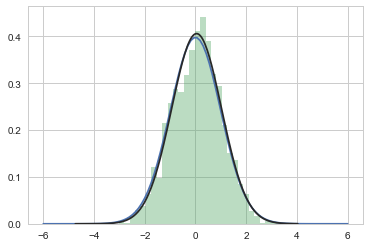

In [40]:
rv_t = sp.stats.t(N1 - 1)   # t 분포
xx = np.linspace(-6, 6, 100)
plt.plot(xx, rv_t.pdf(xx))
sns.distplot(t, kde=False, fit=sp.stats.t)
plt.show()

# Beta Distribution

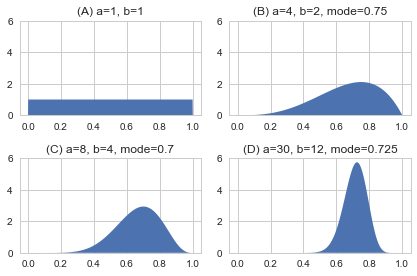

In [41]:
xx = np.linspace(0, 1, 1000)
plt.subplot(221)
plt.fill(xx, sp.stats.beta(1.0001, 1.0001).pdf(xx)); plt.ylim(0, 6)
plt.title("(A) a=1, b=1")
plt.subplot(222)
plt.fill(xx, sp.stats.beta(4, 2).pdf(xx)); plt.ylim(0, 6)
plt.title("(B) a=4, b=2, mode={0}".format((4-1)/(4+2-2)))
plt.subplot(223)
plt.fill(xx, sp.stats.beta(8, 4).pdf(xx)); plt.ylim(0, 6)
plt.title("(C) a=8, b=4, mode={0}".format((8-1)/(8+4-2)))
plt.subplot(224)
plt.fill(xx, sp.stats.beta(30, 12).pdf(xx)); plt.ylim(0, 6)
plt.title("(D) a=30, b=12, mode={0}".format((30-1)/(30+12-2)))
plt.tight_layout()
plt.show()

# 감마 분포

# 조건부 확률질량함수

In [42]:
pmf = np.array([[1, 2, 1, 0, 0, 0],
                [0, 2, 3, 1, 0, 0],
                [0, 4, 6, 4, 1, 0],
                [0, 1, 4, 6, 4, 0],
                [0, 0, 1, 3, 2, 0],
                [0, 0, 0, 1, 2, 1]])
pmf = pmf/pmf.sum()
pmf

array([[ 0.02,  0.04,  0.02,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.04,  0.06,  0.02,  0.  ,  0.  ],
       [ 0.  ,  0.08,  0.12,  0.08,  0.02,  0.  ],
       [ 0.  ,  0.02,  0.08,  0.12,  0.08,  0.  ],
       [ 0.  ,  0.  ,  0.02,  0.06,  0.04,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.02,  0.04,  0.02]])

In [45]:
pmf_marginal_x = pmf.sum(axis=0)
pmf_marginal_x

array([ 0.02,  0.18,  0.3 ,  0.3 ,  0.18,  0.02])

In [46]:
pmf_marginal_y = pmf.sum(axis=1)
pmf_marginal_y[:, np.newaxis]

array([[ 0.08],
       [ 0.12],
       [ 0.3 ],
       [ 0.3 ],
       [ 0.12],
       [ 0.08]])

# 조건부 확률질량함수